In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from glob import glob

import IPython.display as ipd
from tqdm import tqdm

import subprocess as sp

plt.style.use('ggplot')

from useful_fn import *

DATA_PATH = "./data/"

In [2]:
! ls 

Experiments.ipynb  data  requirements_notebooks.txt
__pycache__	   imgs  useful_fn.py


In [2]:
witdh = 640
height = 480

VIDEO_PATH_COMP = DATA_PATH + "street_compresed.mp4"
VIDEO_PATH_EXP = DATA_PATH + "exp.mp4"

In [18]:
#sp.run(['ffmpeg','-i', DATA_PATH + "street.mp4", '-qscale', '0', VIDEO_PATH_COMP, '-loglevel', 'quiet'])

#sp.run(['ffmpeg', '-i', VIDEO_PATH_COMP, '-vf', f'scale={witdh}:{height}', VIDEO_PATH_EXP, '-loglevel', 'quiet'])

CompletedProcess(args=['ffmpeg', '-i', './data/street_compresed.mp4', '-vf', 'scale=640:480', './data/exp.mp4', '-loglevel', 'quiet'], returncode=0)

In [3]:
ipd.Video(VIDEO_PATH_EXP, width=600)

In [4]:
show_basic_info(VIDEO_PATH_EXP)

WIDTH: 640.0
HEIGHT: 480.0
FRAMES: 1153.0
FPS: 30.00
TOTAL SECONDS: 38.43


In [5]:
! ls

Experiments.ipynb  data  requirements_notebooks.txt
__pycache__	   imgs  useful_fn.py


In [3]:
# Generate some images 
# generate_imgs(video=VIDEO_PATH_EXP, output="imgs/", every_n_frames=50)

# Display multiple frames from the video

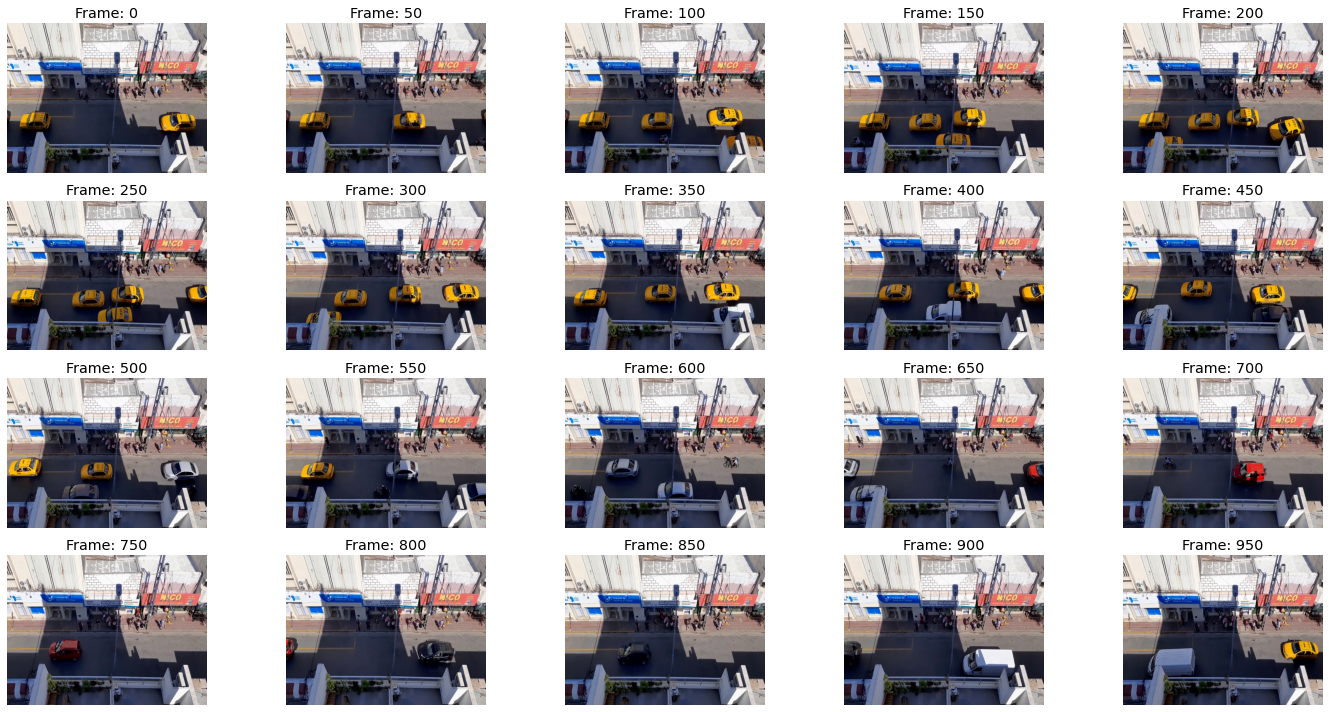

In [5]:
fig, axs = plt.subplots(4, 5, figsize=(20,10))
axs = axs.flatten()

cap = cv2.VideoCapture(VIDEO_PATH_EXP)
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame_idx in range(n_frames):
    ret, img = cap.read()
    if not ret : break
    
    if (frame_idx % 50 == 0) and (img_idx < 20):
        axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[img_idx].set_title(f"Frame: {frame_idx}")
        axs[img_idx].axis("off")
        img_idx += 1
        
plt.tight_layout()
plt.show()
cap.release()

# Annotations

In [3]:
categories_map = {
    0 : "car"
}

In [4]:
annotations = get_annotations("train", witdh, height, categories_map)
annotations

,label_name,center_x,center_y,bbox_width,bbox_height,image_name
0,car,88.91008,313.36512,102.36992,58.00944,frame_0000.jpeg
1,car,545.59232,318.48336,119.43104,63.69648,frame_0000.jpeg
2,car,91.75360,312.79632,105.78176,56.87184,frame_0050.jpeg
3,car,394.31296,316.77744,105.78176,62.55936,frame_0050.jpeg
4,car,93.45984,309.38400,102.36992,63.69648,frame_0100.jpeg
...,...,...,...,...,...,...
58,car,463.12768,344.64432,168.34112,93.27024,frame_0900.jpeg
59,car,152.03776,342.93840,160.37888,85.30800,frame_0950.jpeg
60,car,566.63488,304.26528,120.56896,71.65872,frame_0950.jpeg
61,car,274.31296,300.28416,106.91968,68.24640,frame_1000.jpeg


In [5]:
def display_cv2_img(img, figsize=(10, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis("off")

In [7]:
def show_img_annotations(frame_file):
    img = cv2.imread(f"train/{frame_file}")
    font = cv2.FONT_HERSHEY_TRIPLEX
    img_example = img.copy()
    frame_labels = annotations.query(f"image_name == '{frame_file}'")
    for i, d in frame_labels.iterrows():
        img_center_x = d['center_x']
        img_center_y = d['center_y']
        img_width = d['bbox_width']
        img_height = d['bbox_height']

        pt1 = int(img_center_x - img_width/2), int(img_center_y + img_height/2)
        pt2 = int(img_center_x + img_width/2), int(img_center_y - img_height/2)
        img_example = cv2.rectangle(img_example, pt1, pt2, (0, 0, 255), 3)

        pt_text = pt1[0] + 5, pt1[1] + 10
        img_example = cv2.putText(img_example, d["label_name"], pt_text, font, 0.5, (0, 0, 255))

    display_cv2_img(img_example)

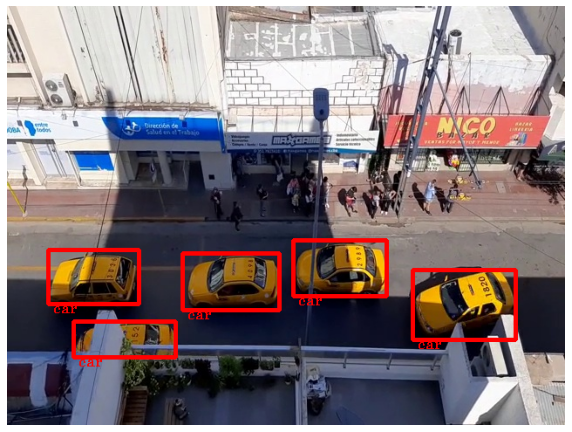

In [13]:
show_img_annotations("frame_0200.jpeg")